# MNIST Handwriting Classification


In [1]:
# Downloading the MNIST dataset
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame=False)

/opt/conda/lib/python3.10/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [2]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
X, y = mnist['data'], mnist['target']
print(X.shape, y.shape)

(70000, 784) (70000,)


There are 70,000 images with 784 features (28x28 pixels)


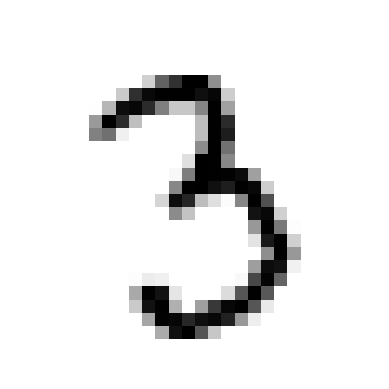

'3'

In [4]:
# Viewing one of the images
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit=X[30000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation='nearest')
plt.axis('off')
plt.show()

y[30000]

In [5]:
# The dataset is already split into train and test as first 60,000 for train and the rest for test
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [6]:
# We shuffle the train set so we get a spread of digits
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

# Training a Binary Classifier

In [7]:
# Testing for 5 or not 5
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

In [8]:
# Use a Stochastic Gradient Descent classifier and train on the whole training set
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [9]:
sgd_clf.predict([some_digit])

array([False])

# Performance Measures

In [10]:
# Evaluate the SGD Classifier with K-fold CV with 3 folds
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.95935, 0.96225, 0.9657 ])

95% seems good accuracy, but lets check a dumb classifier which assigns every image as 'not 5'

In [11]:
# Dumb classifier model
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)
    

In [12]:
# Testing the model's accuracy
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.90885, 0.91235, 0.90775])

Gives 90% accuracy as only about 10% of the images are '5's

In [13]:
# cross_val_predict returns the predictions made on each test fold
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [14]:
# Now we can produce a confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[54114,   465],
       [ 1789,  3632]])

Non-5 on the top row, so 54237 correctly identified as not 5, and 3682 correctly idenitified as 5

**Precision and Recall**

In [15]:
# Calculating the precision and recall
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)


0.8865023187698315

In [16]:
recall_score(y_train_5, y_train_pred)

0.6699870872532743

In [17]:
# Compute the F_1 score
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7631855431813406